Day-1 Data collection and Setup

In [120]:
import pandas as pd
import numpy as np

In [121]:
data_frame=pd.read_csv('data_set\\Heart.csv')

print(data_frame.head())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


Day-2 Data pre-processing and Data cleaning 

In [122]:
data_frame.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [123]:
print(data_frame['Thal'].value_counts())
print (data_frame['Thal'].unique())

Thal
normal        166
reversable    117
fixed          18
Name: count, dtype: int64
['fixed' 'normal' 'reversable' nan]


In [124]:
# Filling null values of Thal column 
data_frame['Thal'].fillna(data_frame['Thal'].mode()[0], inplace=True)
data_frame.isnull().sum()

C:\Users\MaanPatel\AppData\Local\Temp\ipykernel_29852\65416047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['Thal'].fillna(data_frame['Thal'].mode()[0], inplace=True)


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          0
AHD           0
dtype: int64

In [125]:
print(data_frame['Ca'].unique())
print(data_frame['Ca'].value_counts())

[ 0.  3.  2.  1. nan]
Ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


In [146]:
data_frame.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [126]:
data_frame.dropna(inplace=True)

In [127]:
# Since it is sensitive we will replace null values with "unkown value"
# data_frame['Ca'].fillna('unknown', inplace=True)
# data_frame.isnull().sum()

In [128]:
# Removing unamed column from data frame
data_frame.drop('Unnamed: 0', axis=1, inplace=True)
print(data_frame.head())

   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes  
3      3  0.0      normal   No  
4      1  0.0      normal   No  


In [129]:
print(data_frame['ChestPain'].unique())
print(data_frame['ChestPain'].value_counts())

print("-------------------------------------------Values after encoding------------------------------------------------------")

# encoding the categorical of chest pain column
data_frame['ChestPain'] = data_frame['ChestPain'].map({'typical':0, 'asymptomatic':1, 'nonanginal':2, 'nontypical':3})
print(data_frame['ChestPain'].unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
ChestPain
asymptomatic    143
nonanginal       84
nontypical       49
typical          23
Name: count, dtype: int64
-------------------------------------------Values after encoding------------------------------------------------------
[0 1 2 3]


In [130]:
print(data_frame['Thal'].unique())

print("-------------------------------------------Values after encoding------------------------------------------------------")

# ecoding the categorical values of Thal column
data_frame['Thal'] = data_frame['Thal'].map({'normal':0, 'reversable':1, 'fixed':2})
print(data_frame['Thal'].unique())



['fixed' 'normal' 'reversable']
-------------------------------------------Values after encoding------------------------------------------------------
[2 0 1]


In [131]:
# encoding ADH column
print(data_frame['AHD'].unique())

data_frame['AHD'] = data_frame['AHD'].map({'No':0, 'Yes':1})
print(data_frame['AHD'].unique())

['No' 'Yes']
[0 1]


In [132]:
data_frame.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,2,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,1,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,0,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,0,0


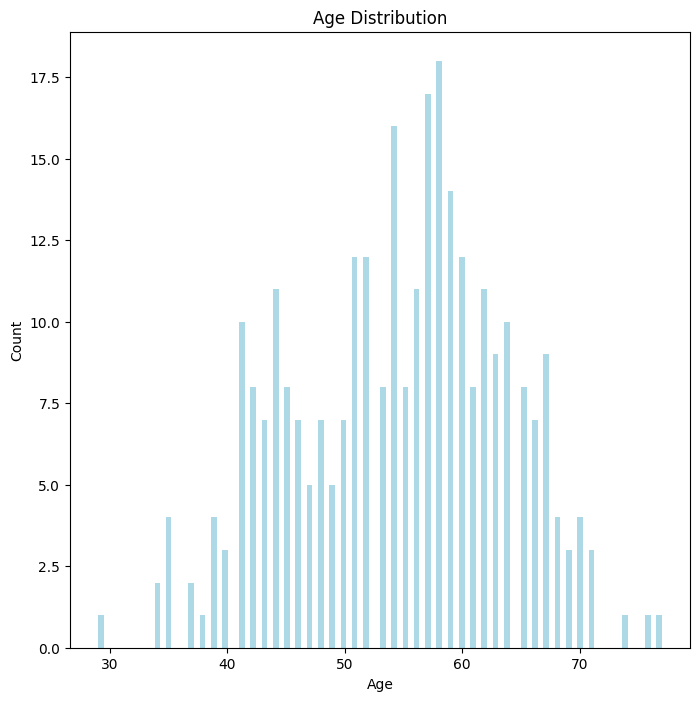

In [133]:
import matplotlib.pyplot as plt

# Plotting pie chart for Age column using histogram
# put gap between bars
plt.figure(figsize=(8, 8))
plt.hist(data_frame['Age'], bins=100, color='lightblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


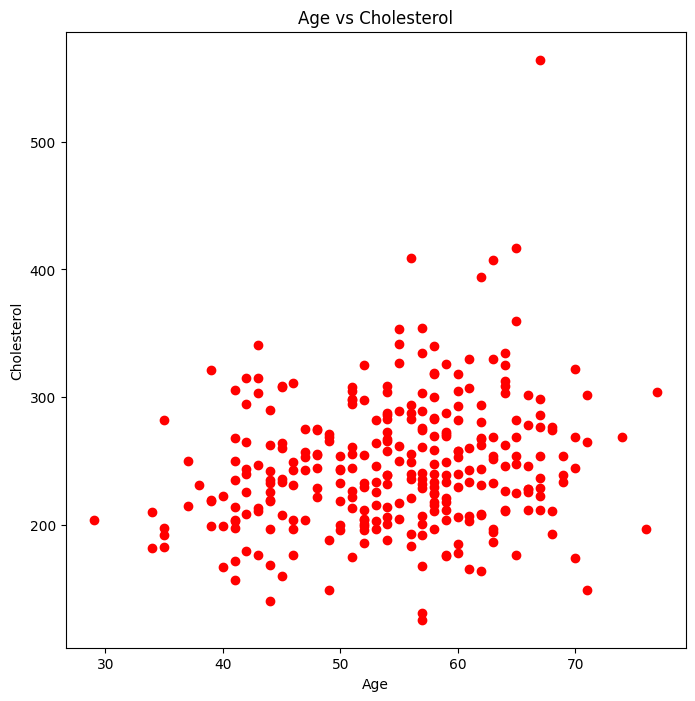

In [134]:
# getting age vs cholesterol data, to see the relation between them 

plt.figure(figsize=(8, 8))
plt.scatter(data_frame['Age'], data_frame['Chol'], color='red')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


DAY -3 Modeling and Presentaion

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [136]:
x = data_frame.drop(columns=['AHD'])
y = data_frame['AHD']

print(x)

     Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0     63    1          0     145   233    1        2    150      0      2.3   
1     67    1          1     160   286    0        2    108      1      1.5   
2     67    1          1     120   229    0        2    129      1      2.6   
3     37    1          2     130   250    0        0    187      0      3.5   
4     41    0          3     130   204    0        2    172      0      1.4   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
297   57    0          1     140   241    0        0    123      1      0.2   
298   45    1          0     110   264    0        0    132      0      1.2   
299   68    1          1     144   193    1        0    141      0      3.4   
300   57    1          1     130   131    0        0    115      1      1.2   
301   57    0          3     130   236    0        2    174      0      0.0   

     Slope   Ca  Thal  
0        3  0.0     2  
1  

In [137]:
print(y)

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 299, dtype: int64


In [138]:
# Dividing the dataset 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [139]:
x_train.dropna(inplace=True)

In [140]:
# craeting the model
model = LogisticRegression()

In [141]:
# training the model
model.fit(x_train, y_train)

c:\data_assessment_1\assessmentenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [142]:
# testing the model
predictions = model.predict(x_test)


In [145]:
# checking the accuracy of the model
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, predictions)*100)

Accuracy: 85.0
